# Detecting Climate Disinformation based on text from news articles : Explore the Data 

## Import Python Packages

In [2]:
from datasets import (load_dataset_builder,
                      load_dataset,
                      get_dataset_split_names)
import numpy as np
import pandas as pd

from tqdm import tqdm

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from pprint import pprint

print('All packages imported successfully!')

All packages imported successfully!


## Explore the Dataset

In [3]:
ds_builder = load_dataset_builder("QuotaClimat/frugalaichallenge-text-train")

In [4]:
# Inspect the number of splits available for the dataset

get_dataset_split_names("QuotaClimat/frugalaichallenge-text-train")

['train']

In [5]:
# Inspect dataset features

ds_builder.info.features

{'quote': Value(dtype='string', id=None),
 'label': Value(dtype='string', id=None),
 'source': Value(dtype='string', id=None),
 'url': Value(dtype='string', id=None),
 'language': Value(dtype='string', id=None),
 'subsource': Value(dtype='string', id=None),
 'id': Value(dtype='null', id=None),
 '__index_level_0__': Value(dtype='int64', id=None)}

In [6]:
# Download the dataset 

dataset = load_dataset("QuotaClimat/frugalaichallenge-text-train", split="train")

In [7]:
print(f"ROWS: {dataset.num_rows}")
print(f"COLUMNS: {dataset.num_columns}")

ROWS: 6091
COLUMNS: 8


In [8]:
print(f"COLUMN NAMES: {dataset.column_names}")

COLUMN NAMES: ['quote', 'label', 'source', 'url', 'language', 'subsource', 'id', '__index_level_0__']


In [9]:
# EXAMPLE ROW
pprint(dataset[0])

{'__index_level_0__': 0,
 'id': None,
 'label': '5_science_unreliable',
 'language': 'en',
 'quote': 'There is clear, compelling evidence that many of the major '
          'conclusions of the IPCC, your new religions constantly-changing '
          'Holy Book, are based on evidence that has been fabricated. The '
          'hockey stick graph that purported to abolish the mediaeval warm '
          'period is just one example.',
 'source': 'FLICC',
 'subsource': 'CARDS',
 'url': 'https://huggingface.co/datasets/fzanartu/FLICCdataset'}


In [10]:
# Get unique values from the 'language' column
dataset.unique('language')

['en']

In [11]:
# Get the count of unique URLs
len(dataset.unique('url'))

780

In [12]:
# Get unique values from the 'source' column
dataset.unique('source')

['FLICC', 'Desmog']

In [13]:
# Get unique values from the 'subsource' column
dataset.unique('subsource')

['CARDS',
 'hamburg_test1',
 'hamburg_test3',
 'jindev',
 'jintrain',
 'hamburg_test2',
 'Alhindi_train',
 'jintest',
 'Alhindi_dev',
 'Alhindi_test',
 None]

In [14]:
# Get the count of unique quotes
len(dataset.unique('quote'))

6091

In [15]:
# Get unique values from the 'label' column
dataset.unique('label')

['5_science_unreliable',
 '1_not_happening',
 '4_solutions_harmful_unnecessary',
 '0_not_relevant',
 '6_proponents_biased',
 '7_fossil_fuels_needed',
 '2_not_human',
 '3_not_bad']

In [16]:
# Get unique values from the 'id' column
dataset.unique('id')

[None]

In [17]:
# Get the count of unique index values.
len(dataset.unique('__index_level_0__'))

6091

We would like to understand some properties of the data. As a start, let's analyze the lengths of different sentences in the  `quote` column. 
We will make a histogram of the number of words in each quote over the full corpus.

In [18]:
def make_histogram(dataset):
  
  num_tokens = []  # each sentence should add an integer to this list.

  # Make a histogram of the lengths of sentences in the dataset.
  pbar = tqdm(total=len(dataset), leave=True, position=0)
  for entry in dataset:
    tokens = entry['quote'].split()
    num_tokens.append(len(tokens))
    pbar.update()
  pbar.close()

  plt.figure()
  plt.hist(num_tokens, bins=1000)
  plt.xlabel('Number of tokens')
  plt.xlim(0, 1000)
  plt.show()
  return num_tokens

100%|██████████| 6091/6091 [00:00<00:00, 12120.94it/s]


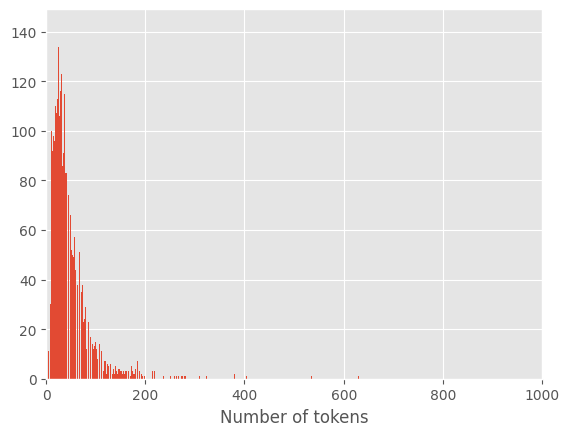

In [19]:
num_tokens = make_histogram(dataset)

In [20]:
# Q: How many words is the shortest quote and how many quotes have that length?

from collections import Counter

token_counter = Counter(num_tokens)
shortest = min(num_tokens)
longest = max(num_tokens)

num_shortest = token_counter[shortest]
num_longest = token_counter[longest]

print(f'{num_shortest} quotes have {shortest} tokens.')
print(f'{num_longest} quotes has {longest} tokens.')

1 quotes have 3 tokens.
1 quotes has 789 tokens.


In [21]:
# print out the shortest entry
for entry in dataset:
  if len(entry['quote'].split()) == shortest:
    pprint(entry)

{'__index_level_0__': 277,
 'id': None,
 'label': '3_not_bad',
 'language': 'en',
 'quote': 'reefs are improving',
 'source': 'FLICC',
 'subsource': 'hamburg_test3',
 'url': 'https://huggingface.co/datasets/fzanartu/FLICCdataset'}


In [22]:
# print out the longest entry

max_tokens = 0
longest_quote = None

for entry in dataset:
    tokens = entry['quote'].split()
    if len(tokens) > max_tokens:
        longest_quote = entry['quote']
        max_tokens = len(tokens)

In [23]:
pprint(longest_quote)

('Hubris is a Greek word that means dangerously overconfident. Based on my '
 'research, hubris fairly describes our current response to the issue of '
 'climate change Here’s what many people believe One: The planet is warming '
 'catastrophically because of certain human behaviors Two: Thanks to powerful '
 'computers we can project what the climate will be like 20, 40, or even 100 '
 'years from now Three: That if we eliminate just one behavior, the burning of '
 'fossil fuels, we can prevent the climate from changing for as long we like '
 'Each of these presumptions—together, the basis of our hubris regarding the '
 'changing climate—is either untrue or so far off the mark as to be useless '
 'Yes, it’s true that the globe is warming, and that humans are exerting a '
 'warming influence upon it. But beyond that, to paraphrase a line from the '
 'classic movie The Princess Bride, ‘I do not think “The Science” says what '
 'you think it says. For example, government reports state cl

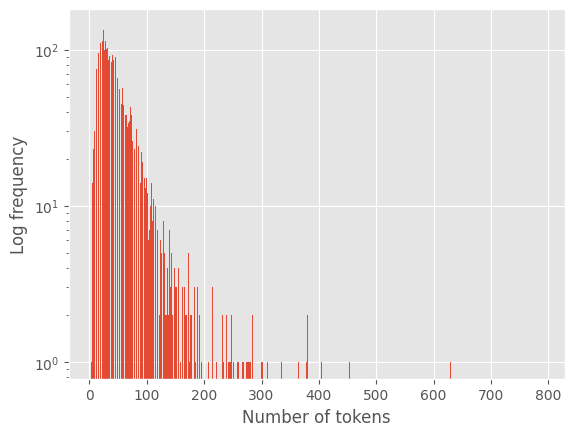

In [24]:
# Re-plot the histogram in log frequency space.
plt.figure()
plt.hist(num_tokens, bins=1000, log=True)
plt.xlabel('Number of tokens')
plt.ylabel('Log frequency')
plt.show()

### Vocabulary Analysis

100%|██████████| 6091/6091 [00:00<00:00, 9452.84it/s]


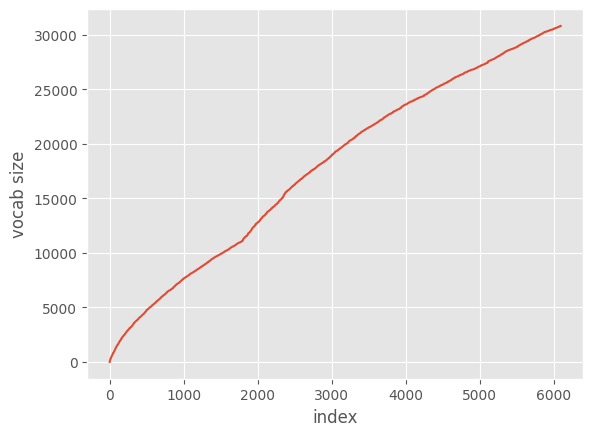

In [25]:
from collections import defaultdict

vocab = defaultdict(lambda: 0)
# after 0 sentences, vocab size is at 0.
vocab_sizes = [0]

# Plot the vocabulary against the number of sentences.
for i in tqdm(range(len(dataset)), leave=True, position=0):
  entry = dataset[i]
  tokens = entry['quote'].split()
  for token in tokens:
    vocab[token] += 1
  vocab_sizes.append(len(vocab))

plt.figure()
plt.plot(vocab_sizes)
plt.xlabel('index')
plt.ylabel('vocab size')
plt.show()

* How big is the vocabulary size?
* How big is the vocabulary for words appearing more than once?
* How big is the vocabulary for words appearing more than three times?

In [26]:
print(f'{len(vocab)} words in vocab.')
print(f'{len([k for k in vocab if vocab[k] > 1])} words appearing > 1 times.')
print(f'{len([k for k in vocab if vocab[k] > 3])} words appearing > 3 times.')

30807 words in vocab.
14009 words appearing > 1 times.
7035 words appearing > 3 times.


Looks like vocabulary continues to grow as a function of the dataset size. There are more than 30k unique words in the vocabulary!

In [27]:
most_frequent = []
least_frequent = []

# Print the most frequent 100 words, and the least frequent 100 words.
words = np.array(list(vocab.keys()))
counts = np.array([vocab[w] for w in words])
words_ordered = words[np.argsort(counts)[::-1]]
most_frequent = words_ordered[:111]
least_frequent = words_ordered[-100:]

print('Most frequent:')
print(most_frequent)
print()
print('Least frequent:')
print(least_frequent)

Most frequent:
['the' 'of' 'to' 'and' 'is' 'a' 'that' 'in' 'climate' 'for' 'are' 'on'
 'not' 'have' 'it' 'be' 'The' 'I' 'as' 'we' 'by' 'has' 'with' 'global'
 'will' 'this' 'from' 'warming' 'change' 'or' 'about' 'you' 'more' 'they'
 'our' 'an' 'at' 'been' 'no' 'than' 'all' 'was' 'would' 'carbon' 'but'
 'energy' 'there' 'their' 'do' 'CO2' 'can' 'what' 'We' 'which' 'people'
 'It' 'who' 'if' 'so' 'think' 'one' 'And' 'should' 'years' 'other'
 'dioxide' 'because' 'temperature' 'its' 'any' 'over' 'these' 'only'
 'even' 'out' 'science' 'it’s' 'going' 'emissions' 'Climate' 'like' '–'
 'much' 'just' 'In' 'very' 'This' 'when' 'gas' 'most' 'some' 'natural'
 'don’t' 'But' 'were' '[…]' 'he' 'scientific' 'human' 'many' 'how' 'also'
 'greenhouse' 'up' 'make' 'If' 'There' 'need' 'being' 'those'
 'environmental']

Least frequent:
['gas]' '[greenhouse' 'Simberg' 'molested' 'inevitability' 'Madhav'
 'topic,”' 'AGU' 'Francisco,' 'defences.' 'two-hundred' 'quo' 'amnesia.'
 'assistance' 'Flom,' 'Meagher' 'cl

### Data Balancing

In [28]:
from collections import Counter

labels = [entry['label'] for entry in dataset]
labels = Counter(labels)
pprint(labels)

Counter({'0_not_relevant': 1618,
         '5_science_unreliable': 801,
         '6_proponents_biased': 782,
         '4_solutions_harmful_unnecessary': 774,
         '1_not_happening': 741,
         '2_not_human': 702,
         '3_not_bad': 386,
         '7_fossil_fuels_needed': 287})


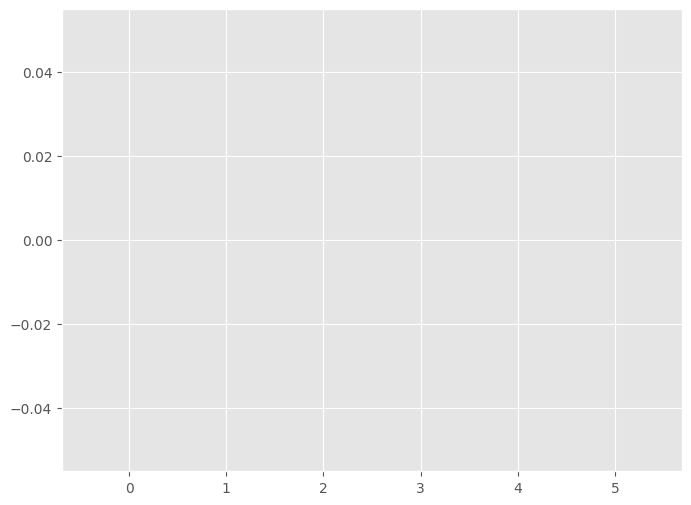

In [29]:
plt.figure(figsize=(8, 6))
plt.bar(
    [0, 1, 2, 3, 4, 5],
    [labels[0.0], labels[1.0], labels[2.0], labels[3.0], labels[4.0], labels[5.0]])
plt.show()